In [1]:
import os

path = "data/"

os.chdir(path)

if os.curdir != path:
    print("Error: Could not change directory to " + path)
    exit(1)

if os.curdir == path:
    print("Success: Changed directory to " + path)
    exit(1)
    
print(os.getcwd())

Error: Could not change directory to data/
c:\GitHub\Metabolic-network-layout-using-biochemical-coordinates\Notebooks\data


# NetworkX
## For GEMs 🗺️ & pathways 🛣️

PLUS ULTRA
mass_rank_MolLogP_rank


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


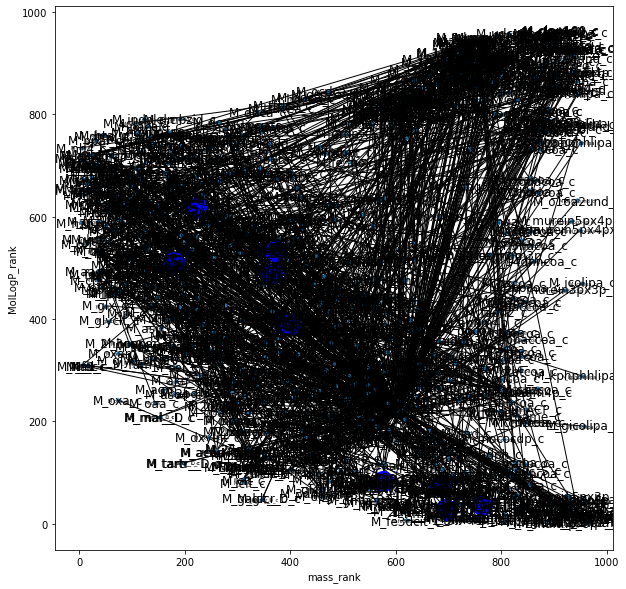

In [39]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()
net3 = nx.DiGraph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
# data = pd.read_csv("iML1515_PCA.csv")
target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
#  😈  E coli core   😈  #
# data = pd.read_csv("Chemical_descriptors_e_coli_core_ranked.csv")
# target  = pd.read_csv("Chemical_descriptors_e_coli_core_ranked_targets.csv")
### 🗺️GEM data🗺️ ####

# 🛣️Pathways🛣️ #

Pathway = input("Enter TCA, GTP, CTP, AMP or Histidine") # TCA, GTP, CTP, AMP or Histidine

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")

# Set descriptorpairs
x_coord = "mass_rank"
y_coord = "MolLogP_rank"


# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 
sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values



file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    net3.add_node(src, pos = c, node_color = 'red')
    net3.add_edge(src,dst)




print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')
pos_net2 = nx.get_node_attributes(net3,'pos')
fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))

pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)


pos_net3_higher = {}
y_off = 0.2  # offset on the y axis
x_off = 0.0

for k, v in pos_net2.items():
    pos_net3_higher[k] = (v[0]+x_off, v[1]+y_off)


nx.draw(net2,pos_net1,node_size =10, with_labels = True, arrows = False, ax = ax)
nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, with_labels = False, arrows = True, ax = ax)
nx.draw_networkx_labels(net3, pos_net3_higher, font_size =25)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord)
ax.set_ylabel(y_coord)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")


In [34]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

net2 = nx.DiGraph()
net3 = nx.DiGraph()


 
Pathway = input("Enter TCA, GTP, CTP, AMP or Histidine") # Core or 1515

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")


#### 🐲GEM data🐲 ####

#  🦣  iML1515   🦣  #
# data = pd.read_csv("1515.csv")
# data = pd.read_csv("iML1515_PCA.csv")
# target = pd.read_csv("1515_targets.csv")
#  🦣  iML1515   🦣   #


target = pd.read_csv(Pathway +"_targets.csv")


#  😈  E coli core   😈  #
#data = pd.read_csv("core.csv")
#target  = pd.read_csv("core_targets.csv")
#  😈  E coli core   😈  #

### 🐲GEM data🐲 ####

# 🗺️Pathways🗺️ #
    
####🍋 TCA data 🍋####

# Normal #

data2 = pd.read_csv("TCA.csv")

# Normal #

# Standardized #


# data = pd.read_csv("TCA_target_standardized_ranked.csv")

# Standardized #

####🍋 TCA data 🍋####

####🍔 FAS 🍔####

# Screw you acyl carrier protein

# data2 = pd.read_csv("Palmitate.csv")


####🍔 FAS 🍔####


####🧬 Nucleotides 🧬####
# data2 = pd.read_csv("CTP.csv")
# data2 = pd.read_csv("AMP.csv")
# data2 = pd.read_csv("GTP.csv")
####🧬 Nucleotides 🧬####

####🦠  Amino acids 🦠####
# Only histidine 
# data2 = pd.read_csv("Histidine.csv")

####🦠  Amino acids 🦠####

# 🗺️Pathways🗺️ #

# Set descriptorpairs
x_coord = "mass"
y_coord = "charge"


# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 
sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values


edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    net3.add_node(src, pos = c, node_color = 'red')
    net3.add_edge(src,dst)




print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')
pos_net2 = nx.get_node_attributes(net3,'pos')
# fig, ax = plt.subplots(figsize=(20,20))

net2.remove_edges_from(nx.selfloop_edges(net2))

nx.draw(net2,pos_net1,node_size =10, with_labels = True, arrows = False, ax = ax)
# nx.draw(net3,pos_net2,node_color = "r", node_size = 4000,font_size = 40, with_labels = True, arrows = True, ax = ax)






PLUS ULTRA


PLUS ULTRA
mass_charge


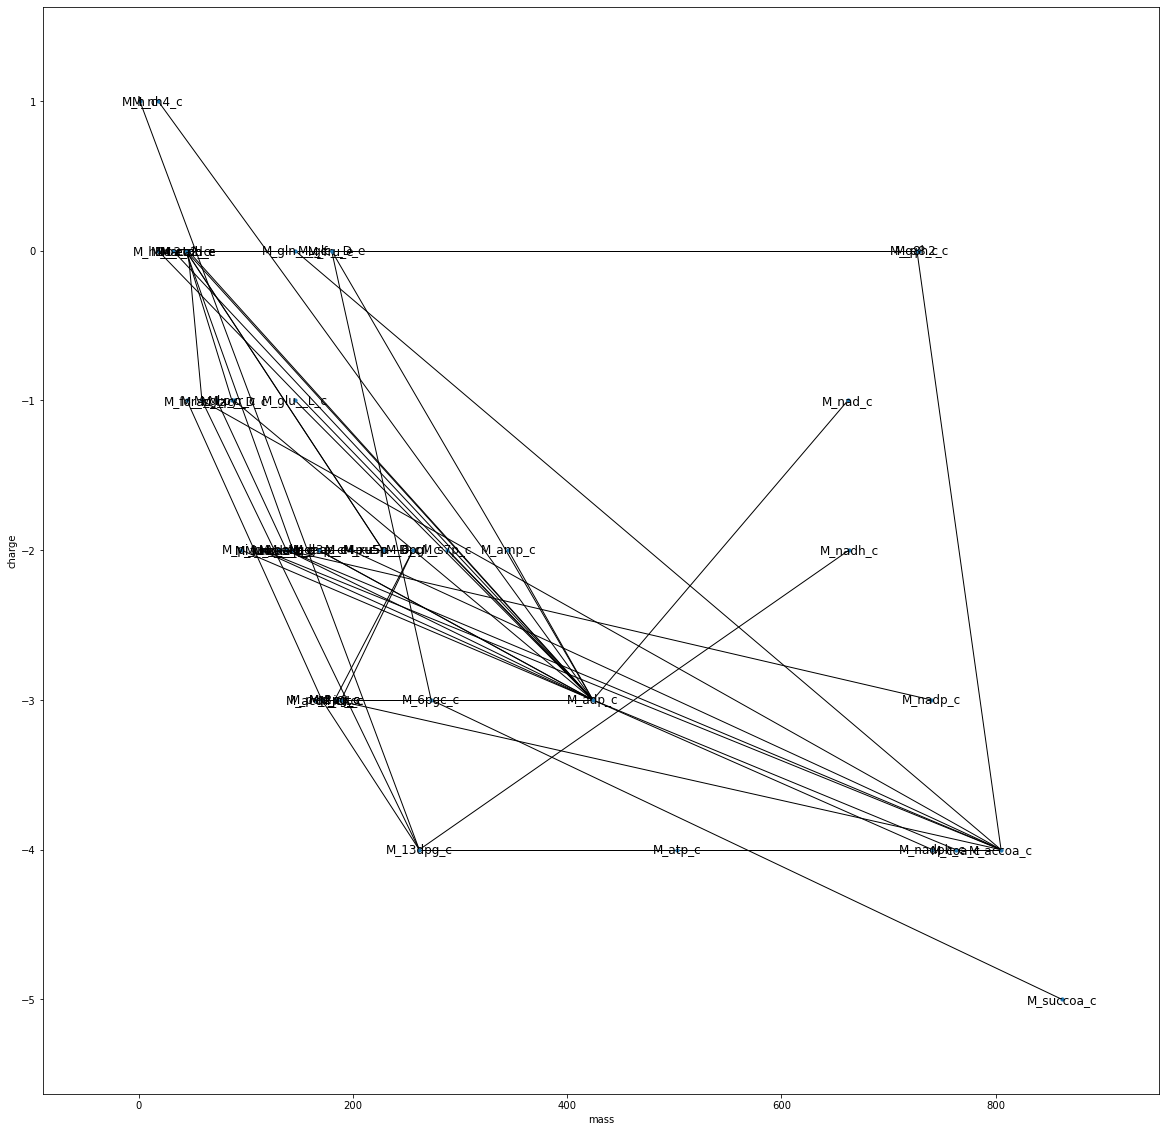

In [5]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

net2 = nx.DiGraph()
net3 = nx.DiGraph()


 
Pathway = input("Enter Core or 1515") # Core or 1515

# 🛣️Pathways🛣️ #
data = pd.read_csv(Pathway + ".csv")




#### 🐲GEM data🐲 ####

#  🦣  iML1515   🦣  #
# data = pd.read_csv("1515.csv")
# data = pd.read_csv("iML1515_PCA.csv")
# target = pd.read_csv("1515_targets.csv")
#  🦣  iML1515   🦣   #


target = pd.read_csv(Pathway +"_targets.csv")


#  😈  E coli core   😈  #
#data = pd.read_csv("core.csv")
#target  = pd.read_csv("core_targets.csv")
#  😈  E coli core   😈  #

### 🐲GEM data🐲 ####

# 🗺️Pathways🗺️ #
    
####🍋 TCA data 🍋####

# Normal #

# data2 = pd.read_csv("TCA.csv")

# Normal #

# Standardized #


# data = pd.read_csv("TCA_target_standardized_ranked.csv")

# Standardized #

####🍋 TCA data 🍋####

####🍔 FAS 🍔####

# Screw you acyl carrier protein

# data2 = pd.read_csv("Palmitate.csv")


####🍔 FAS 🍔####


####🧬 Nucleotides 🧬####
# data2 = pd.read_csv("CTP.csv")
# data2 = pd.read_csv("AMP.csv")
# data2 = pd.read_csv("GTP.csv")
####🧬 Nucleotides 🧬####

####🦠  Amino acids 🦠####
# Only histidine 
# data2 = pd.read_csv("Histidine.csv")

####🦠  Amino acids 🦠####

# 🗺️Pathways🗺️ #

# Set descriptorpairs
x_coord = input("Feature x")
# x_coord = "mass"
y_coord = input("Feature y")


y_coord = "charge"


# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 





print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(20,20))

net2.remove_edges_from(nx.selfloop_edges(net2))

nx.draw(net2,pos_net1,node_size =10, with_labels = True, arrows = False, ax = ax)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord)
ax.set_ylabel(y_coord)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")







# PYVIS
## For pathways 🛣️

In [9]:
from pyvis.network import Network
import pandas as pd

# "Pathways" below
# AMP
# GTP
# CTP
# Histidine
# Palmitate
# pathway = "AMP"
pathway = input("")

data = pd.read_csv(pathway +".csv")

x_coord = "mass_rank"
y_coord = "MolLogP_rank"

sources = data["BiGG"]
targets = data['target']
x_coordinates = data[x_coord]  # Feature x as x coordinates
y_coordinates = data[y_coord] # Feature y as y coordinates
edge_data = zip(sources, targets, x_coordinates, y_coordinates)

g = Network(height='px', width='50%', bgcolor='#222222', font_color='white', directed = True, notebook = False)
#g.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=0.5, spring_strength=0.5, damping=0.09, overlap=0)

for e in edge_data:
    src = e[0]
    dst = e[1]
    x_c = e[2]
    y_c = e[3]

    g.add_node(src, src, x= x_c, y = y_c, node_size=110,  title=src )
    g.add_node(dst, dst, x = x_c, y = y_c,node_size=100,  title=dst)
    g.add_edge(src, dst)


g.toggle_physics(False)
# g.set_edge_smooth("dynamic")
g.show(f"./Pyvis_Stuff/{pathway}_{x_coord}_{y_coord}.html")